<a href="https://colab.research.google.com/github/Fadelmuhammad013/Machine-learning/blob/main/UTS/Classification_Models/Classification_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import library yang dibutuhkan
import pandas as pd

# Membaca dataset
data = pd.read_csv('sample_data/KlasifikasiUTS.csv')  # Gantilah dengan path file yang sesuai

# Menampilkan 5 baris pertama dari dataset
data.head()

# Menampilkan info dataset
data.info()

# Menghapus baris yang memiliki nilai yang hilang (jika ada)
data_cleaned = data.dropna()

# Menghapus kolom duplikat jika ada
data_cleaned = data_cleaned.drop_duplicates()

# Menampilkan info dataset setelah pembersihan
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [2]:
# Pisahkan fitur dan target
X = data_cleaned.drop(['Class'], axis=1)  # Kolom target adalah 'Class'
y = data_cleaned['Class']  # Kolom target adalah 'Class'

# Menghapus fitur yang konstan (variasi = 0)
X = X.loc[:, (X.var() != 0)]

# Menghapus fitur yang berkorelasi tinggi (> 0.8)
cor_matrix = X.corr()

# Menghapus salah satu kolom dari pasangan yang memiliki korelasi > 0.8
to_drop = set()
for i in range(len(cor_matrix.columns)):
    for j in range(i):
        if abs(cor_matrix.iloc[i, j]) > 0.8:  # Korelasi lebih besar dari 0.8
            colname = cor_matrix.columns[i]
            to_drop.add(colname)

X = X.drop(columns=to_drop)

# Menampilkan fitur yang tersisa
print("Fitur yang tersisa setelah seleksi:")
print(X.columns)

# Jika masih ada fitur yang tersisa, lakukan Mutual Information
if X.shape[1] > 0:
    from sklearn.feature_selection import mutual_info_classif

    mi = mutual_info_classif(X, y)
    mi_scores = pd.Series(mi, index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)

    # Pilih 10 fitur terbaik berdasarkan mutual information
    selected_features = mi_scores.index[:10]
    X_selected = X[selected_features]

    print("Fitur yang dipilih berdasarkan Mutual Information:")
    print(X_selected.columns)
else:
    print("Tidak ada fitur yang tersisa setelah seleksi.")

Fitur yang tersisa setelah seleksi:
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
Fitur yang dipilih berdasarkan Mutual Information:
Index(['V17', 'V14', 'V12', 'V10', 'V11', 'V16', 'V4', 'V3', 'V18', 'V9'], dtype='object')


In [3]:
# Import library yang dibutuhkan
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Scaling Fitur Numerik
# Standarisasi data fitur (Scaling ke rentang yang sama)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)  # Menggunakan X_selected yang sudah diseleksi fitur

# Membagi Data menjadi Train dan Test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Menampilkan ukuran data train dan test
print(f"Data Train: {X_train.shape}")
print(f"Data Test: {X_test.shape}")

Data Train: (226980, 10)
Data Test: (56746, 10)


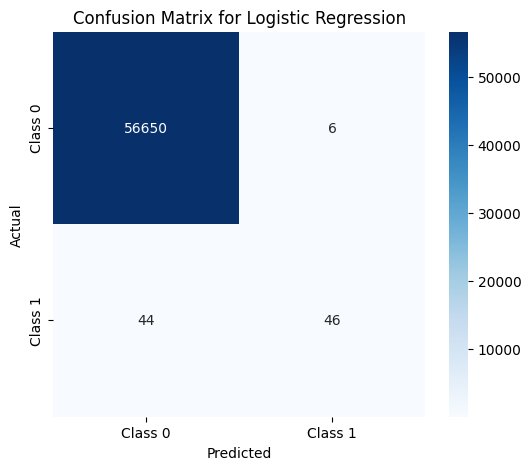

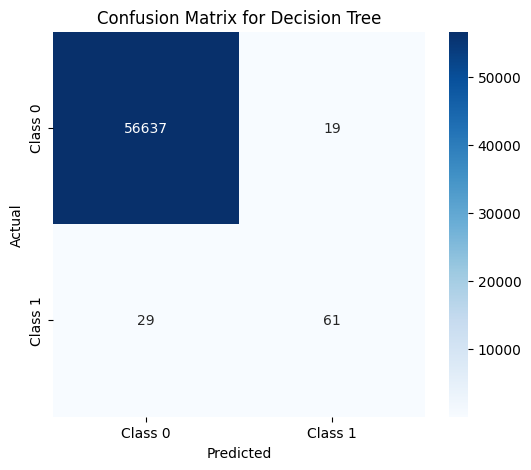

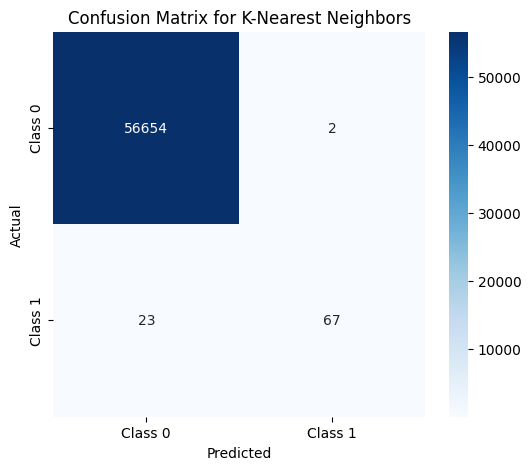

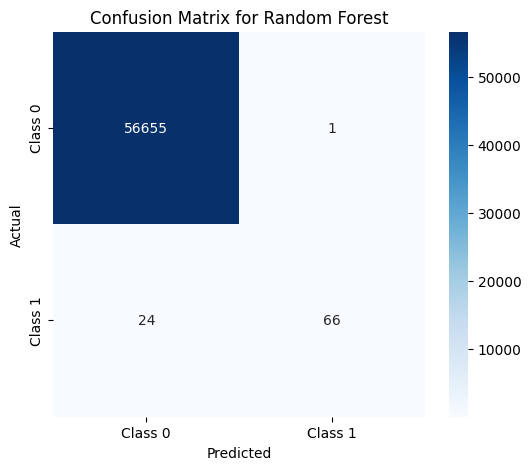

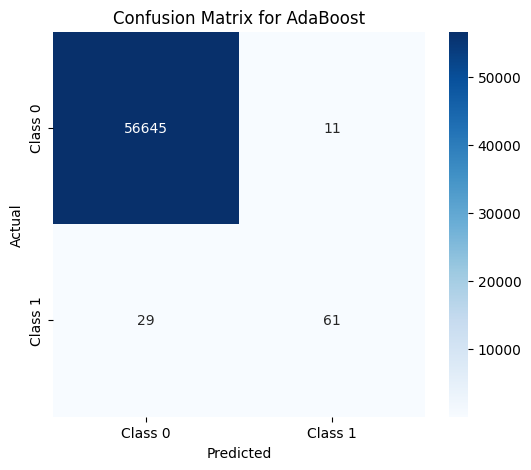

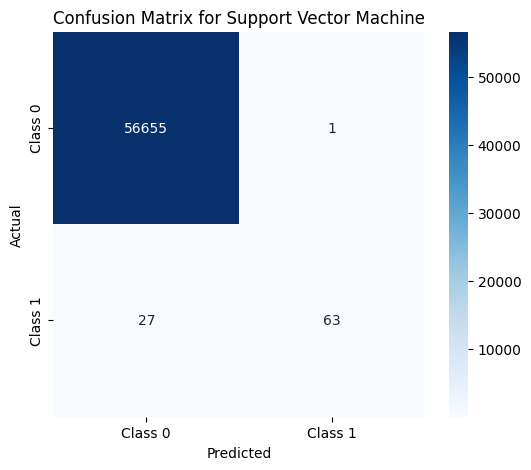

Hasil Evaluasi Metrik untuk Setiap Model:
                        Accuracy  Precision    Recall  F1-Score
Logistic Regression     0.999119   0.884615  0.511111  0.647887
Decision Tree           0.999154   0.762500  0.677778  0.717647
K-Nearest Neighbors     0.999559   0.971014  0.744444  0.842767
Random Forest           0.999559   0.985075  0.733333  0.840764
AdaBoost                0.999295   0.847222  0.677778  0.753086
Support Vector Machine  0.999507   0.984375  0.700000  0.818182


In [4]:
# Import library yang diperlukan
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat daftar model yang akan digunakan
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Support Vector Machine': SVC()
}

# Melatih model dan menghitung metrik evaluasi
results = {}

for model_name, model in models.items():
    # Melatih model
    model.fit(X_train, y_train)

    # Prediksi pada data uji
    y_pred = model.predict(X_test)

    # Menghitung metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Menyimpan hasil evaluasi
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

    # Menampilkan confusion matrix untuk setiap model
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Menampilkan hasil metrik evaluasi
results_df = pd.DataFrame(results).T
print("Hasil Evaluasi Metrik untuk Setiap Model:")
print(results_df)

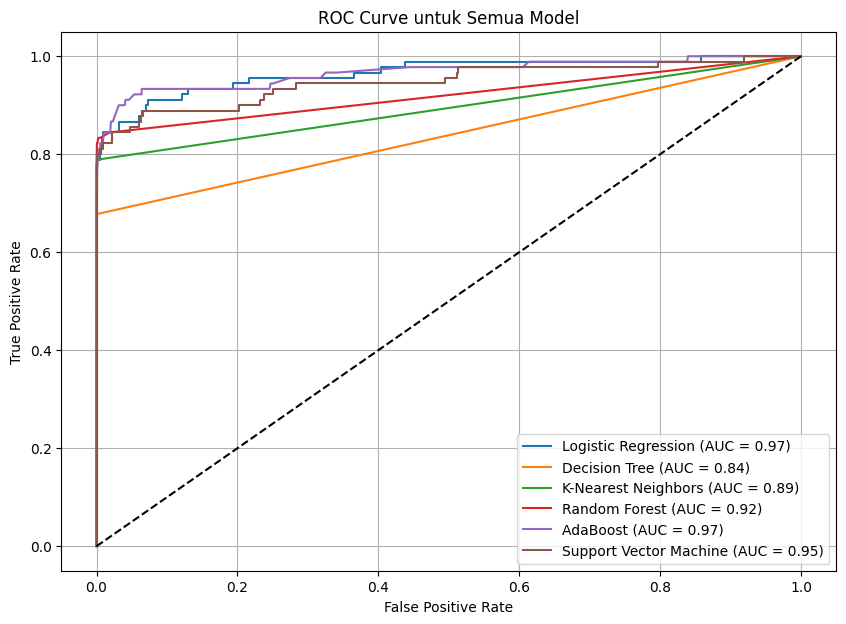

In [5]:
from sklearn.metrics import roc_curve, roc_auc_score

# Menginisialisasi plot ROC
plt.figure(figsize=(10, 7))

# Evaluasi dan visualisasi ROC AUC untuk setiap model
for model_name, model in models.items():
    # Beberapa model tidak memiliki predict_proba (seperti SVC tanpa probabilitas), jadi kita tangani terpisah
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]  # Probabilitas kelas positif
    else:
        # Gunakan decision_function jika predict_proba tidak tersedia (contoh: SVC)
        y_proba = model.decision_function(X_test)

    # Hitung ROC dan AUC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

# Konfigurasi plot
plt.plot([0, 1], [0, 1], 'k--')  # Garis referensi
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve untuk Semua Model')
plt.legend()
plt.grid(True)
plt.show()

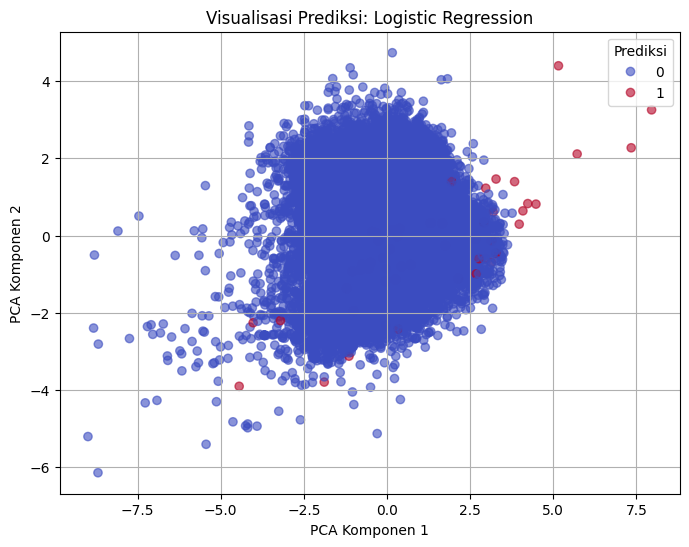

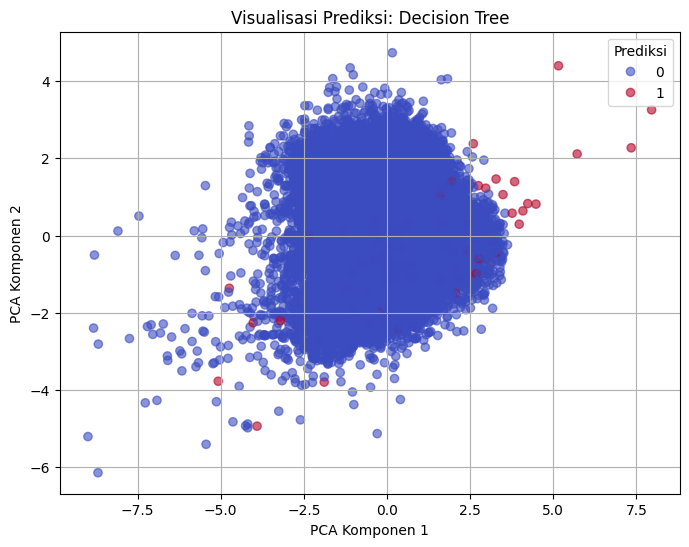

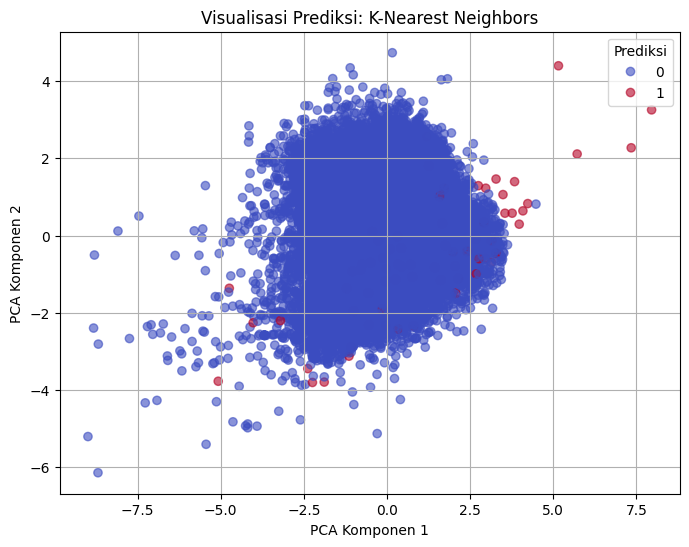

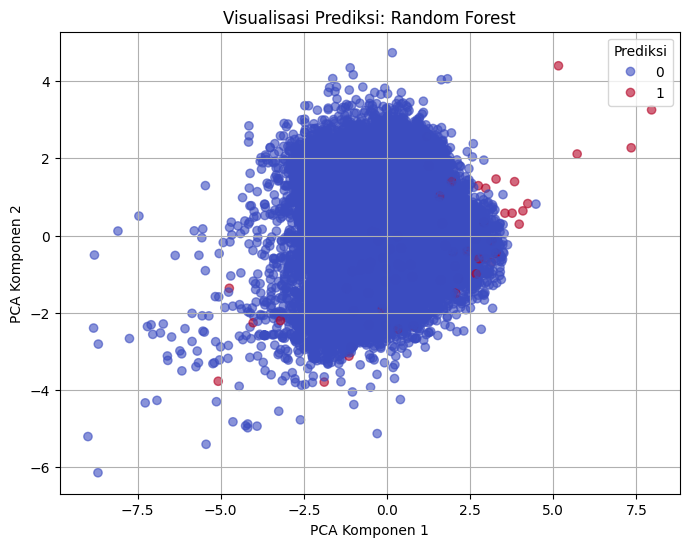

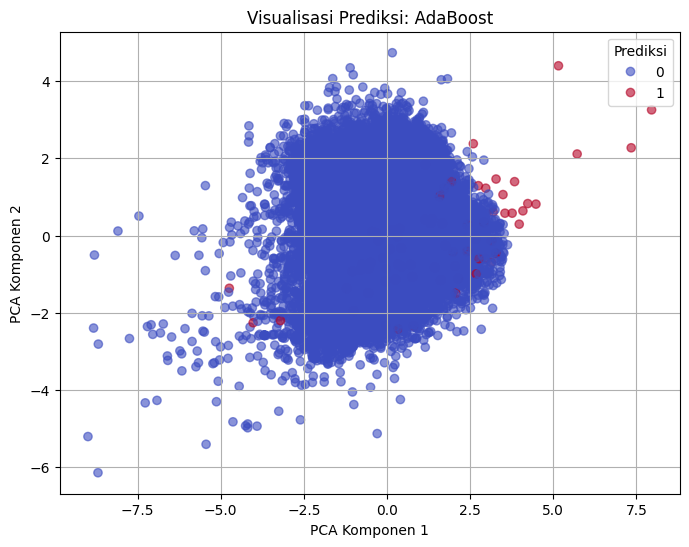

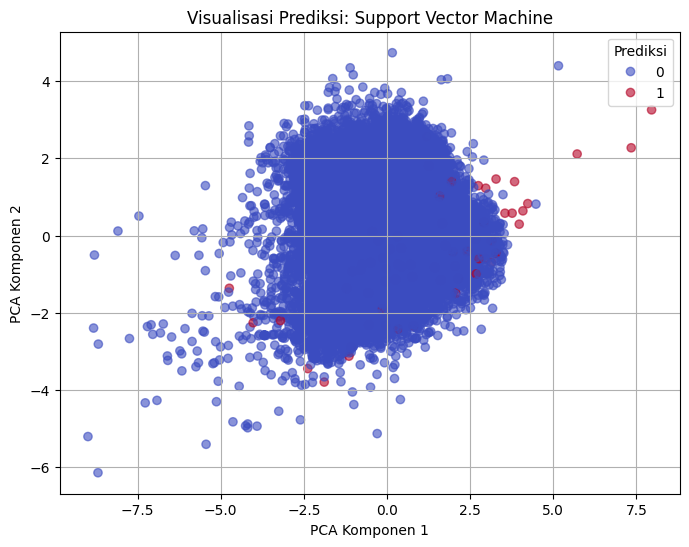

In [6]:
from sklearn.decomposition import PCA

# Reduksi dimensi ke 2D untuk visualisasi
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

# Fungsi untuk visualisasi prediksi model
def plot_model_prediction(model, model_name):
    y_pred = model.predict(X_test)

    plt.figure(figsize=(8, 6))
    plt.title(f'Visualisasi Prediksi: {model_name}')
    scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap='coolwarm', alpha=0.6)
    plt.xlabel('PCA Komponen 1')
    plt.ylabel('PCA Komponen 2')
    plt.legend(*scatter.legend_elements(), title="Prediksi")
    plt.grid(True)
    plt.show()

# Tampilkan visualisasi untuk semua model
for model_name, model in models.items():
    plot_model_prediction(model, model_name)

**Penjelasan Model dan Perhitungan Matematis**

**1. Logistic Regression**

Logistic Regression digunakan untuk memprediksi probabilitas kejadian suatu kelas (biasanya kelas 1)

Rumus:

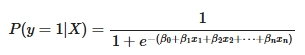

Rumus ini menggunakan fungsi sigmoid untuk mengubah hasil regresi linier menjadi probabilitas antara 0 dan 1.

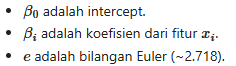

**2. Decision Tree Classifier**

Decision Tree membagi data ke dalam cabang berdasarkan fitur untuk memaksimalkan kemurnian kelas.

Rumus (Gini Impurity):

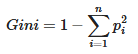

Gini mengukur ketidakmurnian suatu node:

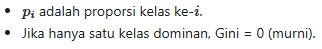

**3. K-Nearest Neighbors (KNN)**

KNN mengklasifikasikan berdasarkan kelas mayoritas dari tetangga terdekat.

Rumus (Jarak Euclidean):

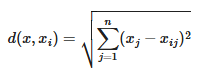

Mengukur jarak antara titik uji ( x ) dan titik pelatihan ( x_i ):

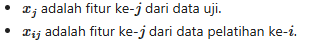

**4. Random Forest (Bagging - Ensemble)**

Random Forest menggabungkan banyak pohon keputusan untuk meningkatkan akurasi.

Rumus (Voting Mayoritas):

image.png

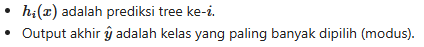

**5. Support Vector Machine (SVM)**

SVM mencari hyperplane terbaik yang memisahkan kelas dengan margin terbesar.

Rumus (Hard Margin):

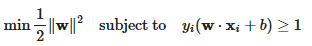

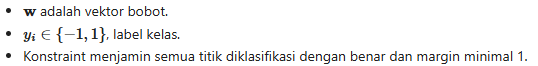

Rumus (Soft Margin):

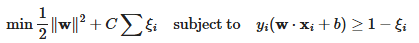

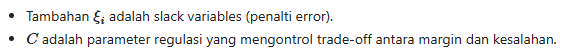

SVM juga dapat menggunakan kernel trick seperti RBF untuk klasifikasi non-linear.

**Perbandingan Model**

Berdasarkan hasil evaluasi berbagai model regresi dengan metrik utama:

*   RMSE (Root Mean Squared Error)
*   MSE (Mean Squared Error)
*   R² Score

**Perbandingan Model:**

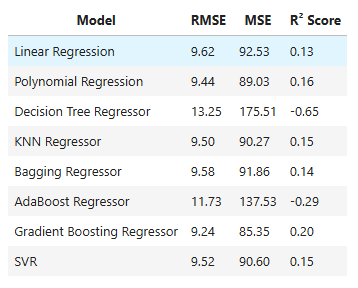

**Model Terbaik : Gradient Boosting Regressor**

Penjelasan :

*   RMSE dan MSE

Menunjukkan prediksi yang paling mendekati nilai aktual.
*   R² Score

Model ini menjelaskan variasi data target lebih baik dari model lainnya.
*   Stabilitas dan Kemampuan

Gradient Boosting adalah metode ensemble yang mampu menangkap pola-pola halus dalam data dengan menggabungkan banyak model lemah secara bertahap.


**kesimpulan**

Gradient Boosting Regressor adalah pilihan terbaik karena memberikan keseimbangan terbaik antara akurasi (RMSE/MSE rendah) dan kemampuan menjelaskan data (R² tinggi).